<a href="https://colab.research.google.com/github/dcthyun0308/ESAA/blob/main/YB2%EC%A1%B0_mini_sh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YB 2조 미니프로젝트1

# 데이터 정리

In [187]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

mpl.rcParams["font.family"] = "NanumGothic"
mpl.rcParams["font.sans-serif"] = ["NanumGothic", "DejaVu Sans"]
mpl.rcParams["axes.unicode_minus"] = False

# (확인용) 지금 선택되는 폰트 이름 출력 → 'NanumGothic'이면 OK
print("Resolved family:", fm.FontProperties(family="NanumGothic").get_name())

# 내부 family 이름으로 다시 지정(하드코딩 대신 안전)
nanum_name = fm.FontProperties(fname=font_path).get_name()
mpl.rcParams["font.family"] = nanum_name
mpl.rcParams["font.sans-serif"] = [nanum_name, "DejaVu Sans"]

# seaborn 쓰면 테마에도 반영
import seaborn as sns
sns.set_theme(rc={"font.family": nanum_name, "axes.unicode_minus": False})

nanum_name = fm.FontProperties(fname=font_path).get_name()
mpl.rcParams["font.family"] = nanum_name
mpl.rcParams["font.sans-serif"] = [nanum_name, "DejaVu Sans"]

import seaborn as sns
sns.set_theme(rc={"font.family": nanum_name, "axes.unicode_minus": False})

Resolved family: NanumGothic


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [173]:
plt.rc('font', family='NanumBarunGothic')

In [174]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [176]:
df.shape

(600, 12)

In [177]:
df.info() #데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [178]:
df.nunique() #고유값 개수 확인

,0
title,600
distributor,169
genre,12
release_time,330
time,86
screening_rat,4
director,472
dir_prev_bfnum,245
dir_prev_num,6
num_staff,296


In [179]:
print(df.isnull().sum()) #결측치 있는 열 확인

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64


In [180]:
df['dir_prev_bfnum'] = df['dir_prev_bfnum'].fillna(0) #결측치 0으로 채우기
print(df['dir_prev_bfnum'].isnull().sum()) #채우고 결측치 수 다시 확인

0


In [181]:
#이상치 확인
Q1 = df['box_off_num'].quantile(0.25)
Q3 = df['box_off_num'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['box_off_num'] < lower) | (df['box_off_num'] > upper)]
out_num = outliers['box_off_num']

print(f'관객수 이상치 개수: {len(out_num)}')


관객수 이상치 개수: 97


In [182]:
#이상치 로그변환
df["box_off_num"] = np.log1p(df["box_off_num"])  # log(x+1) 변환

df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,10.060449
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,15.771725
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,15.755558
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,12.291640
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,13.088575


In [183]:
df['release_time'] = pd.to_datetime(df['release_time']) #datetime형으로 변환
print(df.info()) #변환 여부 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 56.4+ KB
None


# 스텝 수가 관객 수에 미치는 영향과 장르별 차이

스텝 수와 관객 수

- 산점도 및 회귀선

In [184]:
needed = ["genre", "num_staff", "box_off_num"]
missing = [c for c in needed if c not in df.columns]
if missing:
    raise KeyError(f"df에 다음 컬럼이 없습니다: {missing}")

df_plot = df[needed].copy()
df_plot["num_staff"] = pd.to_numeric(df_plot["num_staff"], errors="coerce")
df_plot["box_off_num"] = pd.to_numeric(df_plot["box_off_num"], errors="coerce")
df_plot = df_plot.dropna(subset=["genre","num_staff","box_off_num"])

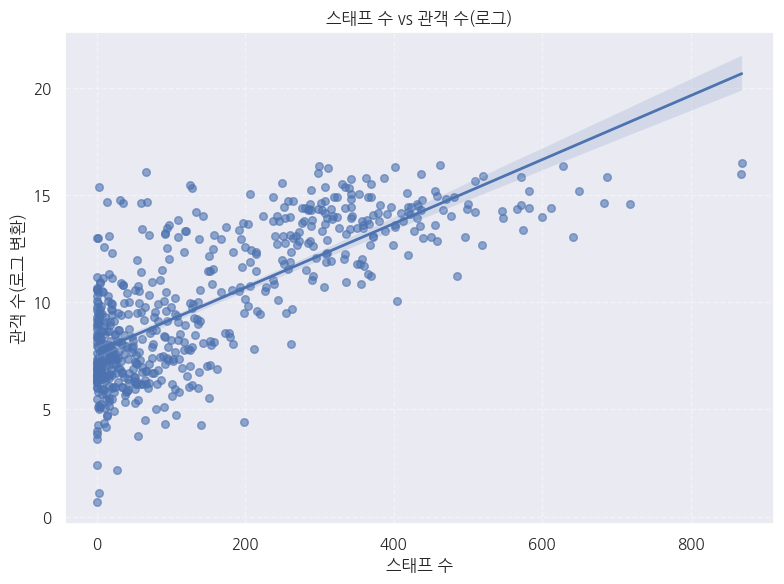

In [188]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_plot,
    x="num_staff",
    y="box_off_num",
    scatter_kws={"alpha": 0.6, "s": 30},
    line_kws={"lw": 2}
)
plt.title("스태프 수 vs 관객 수(로그)")
plt.xlabel("스태프 수")
plt.ylabel("관객 수(로그 변환)")
plt.grid(True, axis="both", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

장르 별 스텝 수
- 장르 별 스텝 수 분포

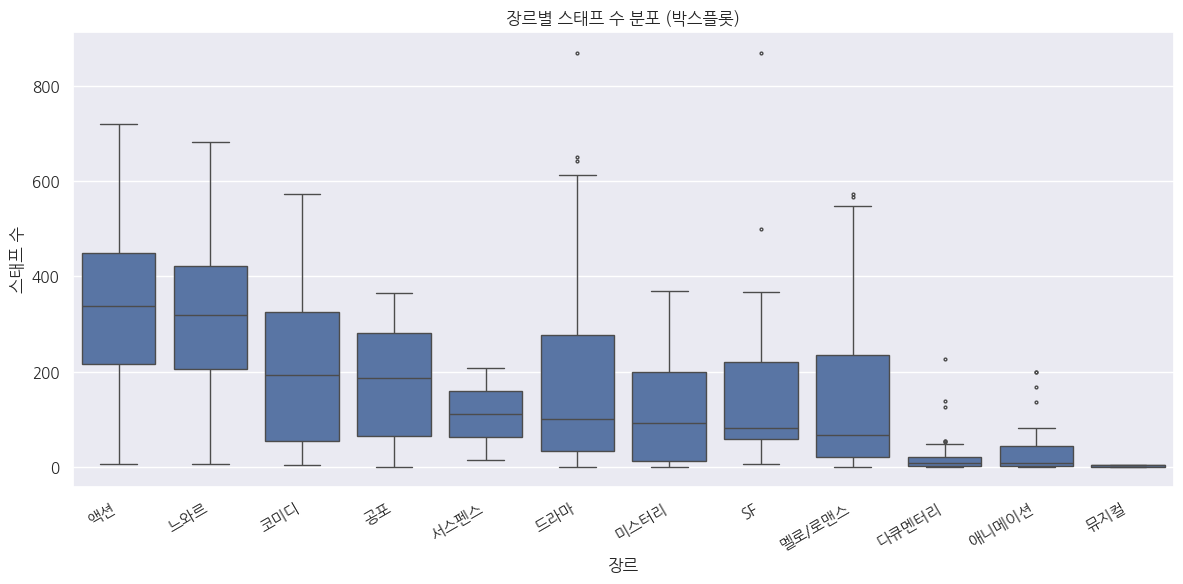

In [189]:
order_med = (df_plot.groupby("genre")["num_staff"]
                      .median()
                      .sort_values(ascending=False)
                      .index)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_plot,
    x="genre",
    y="num_staff",
    order=order_med,
    fliersize=2
)
plt.title("장르별 스태프 수 분포 (박스플롯)")
plt.xlabel("장르")
plt.ylabel("스태프 수")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [190]:
gn_staff = df.groupby('genre')['num_staff'].mean().sort_values(ascending=False)
gn_staff.head(5)

,num_staff
genre,
액션,337.535714
느와르,311.074074
코미디,209.075472
SF,197.307692
공포,176.380952


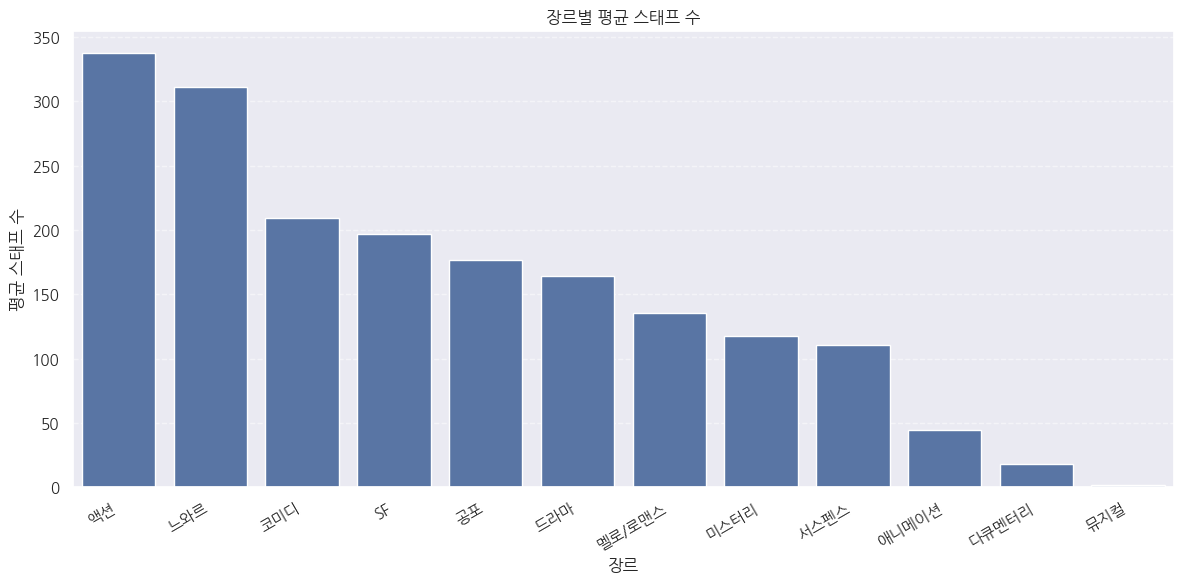

In [191]:
gn_staff = (df_plot.groupby("genre", as_index=False)["num_staff"]
                    .mean()
                    .sort_values("num_staff", ascending=False))

plt.figure(figsize=(12, 6))
sns.barplot(
    data=gn_staff,
    x="genre",
    y="num_staff",
    order=gn_staff["genre"],
    errorbar=None
)
plt.title("장르별 평균 스태프 수")
plt.xlabel("장르")
plt.ylabel("평균 스태프 수")
plt.xticks(rotation=30, ha="right")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()